In [31]:
from google.colab import files
upload = files.upload()

Saving archive (4).zip to archive (4) (8).zip


In [32]:
import os
os.listdir("/content/")


['.config',
 'archive (4) (7).zip',
 'archive (4).zip',
 'archive (4) (8).zip',
 'archive (4) (3).zip',
 'archive (4) (2).zip',
 'archive (4) (5).zip',
 'archive (4) (6).zip',
 'archive (4) (4).zip',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'archive (4) (1).zip',
 'sample_data']

In [33]:
import zipfile
import os

zip_path = "/content/archive (4).zip"   # jo naam Files me dikh raha ho
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir("/content/")


['.config',
 'archive (4) (7).zip',
 'archive (4).zip',
 'archive (4) (8).zip',
 'archive (4) (3).zip',
 'archive (4) (2).zip',
 'archive (4) (5).zip',
 'archive (4) (6).zip',
 'archive (4) (4).zip',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'archive (4) (1).zip',
 'sample_data']

In [34]:
['archive (4).zip', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']


['archive (4).zip', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [35]:
import pandas as pd

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
# Target column ko numeric banana
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# ID column drop karna
df = df.drop('customerID', axis=1)

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Missing values in Churn: 0


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:10:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Baseline Training Accuracy: 0.9385871494497693
Baseline Test Accuracy: 0.78708303761533
Baseline Training AUC: 0.9860633132427412
Baseline Test AUC: 0.8178627709318248
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:10:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:10:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'reg_alpha': 0, 'reg_lambda': 10}
Best CV AUC: 0.8322817251936785

Final Model Training Accuracy: 0.8975860844870429
Final Model Test Accuracy: 0.7821149751596878
Final Model Training AUC: 0.9580215439885388
Final Model Test AUC: 0.8258234519104084


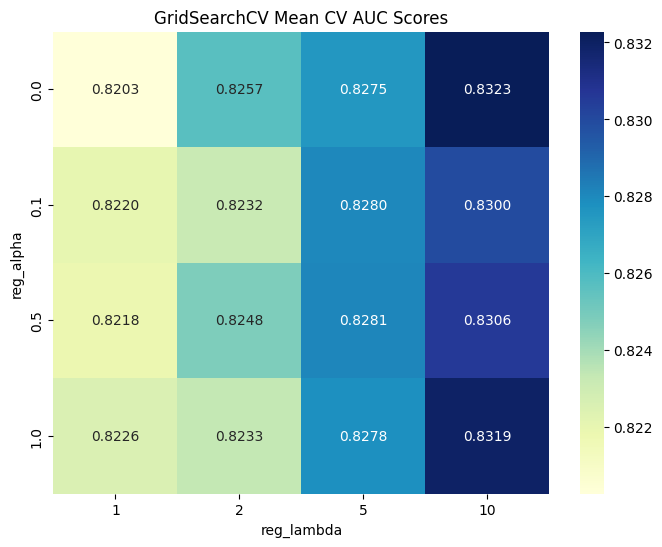


Performance Comparison:

           Model  Train Accuracy  Test Accuracy  Train AUC  Test AUC
0       Baseline        0.938587       0.787083   0.986063  0.817863
1  Final (Tuned)        0.897586       0.782115   0.958022  0.825823


In [37]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Dataset already loaded
# df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")  # Already done
# df.head()  # optional to check

# Step 3: Preprocess dataset
# Target column is already numeric: Churn 1/0
# CustomerID already dropped

# Check for NaN values in target
print("Missing values in Churn:", df['Churn'].isna().sum())
df = df.dropna(subset=['Churn'])

# Encode other categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 4: Split data into train and test sets
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Baseline XGBoost model
baseline_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, baseline_model.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1])

print("Baseline Training Accuracy:", train_acc)
print("Baseline Test Accuracy:", test_acc)
print("Baseline Training AUC:", train_auc)
print("Baseline Test AUC:", test_auc)

# Step 6: GridSearchCV for regularization tuning
param_grid = {
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [1, 2, 5, 10]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)

# Step 7: Train final model with best parameters
final_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    reg_alpha=grid.best_params_['reg_alpha'],
    reg_lambda=grid.best_params_['reg_lambda']
)
final_model.fit(X_train, y_train)

y_train_final = final_model.predict(X_train)
y_test_final = final_model.predict(X_test)

train_acc_final = accuracy_score(y_train, y_train_final)
test_acc_final = accuracy_score(y_test, y_test_final)
train_auc_final = roc_auc_score(y_train, final_model.predict_proba(X_train)[:,1])
test_auc_final = roc_auc_score(y_test, final_model.predict_proba(X_test)[:,1])

print("\nFinal Model Training Accuracy:", train_acc_final)
print("Final Model Test Accuracy:", test_acc_final)
print("Final Model Training AUC:", train_auc_final)
print("Final Model Test AUC:", test_auc_final)

# Step 8: Heatmap of GridSearchCV CV scores
results = pd.DataFrame(grid.cv_results_)
scores_matrix = results.pivot(index='param_reg_alpha', columns='param_reg_lambda', values='mean_test_score')

plt.figure(figsize=(8,6))
sns.heatmap(scores_matrix, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("GridSearchCV Mean CV AUC Scores")
plt.ylabel("reg_alpha")
plt.xlabel("reg_lambda")
plt.show()

# Step 9: Performance comparison table
comparison = pd.DataFrame({
    "Model": ["Baseline", "Final (Tuned)"],
    "Train Accuracy": [train_acc, train_acc_final],
    "Test Accuracy": [test_acc, test_acc_final],
    "Train AUC": [train_auc, train_auc_final],
    "Test AUC": [test_auc, test_auc_final]
})

print("\nPerformance Comparison:\n")
print(comparison)
